In [1]:
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision.all import *

In [3]:
path = Path('/home/qiao/.fastai/data/camvid/')
print(path)
path_img = path/'images'
path_label = path/'labels'

/home/qiao/.fastai/data/camvid


In [4]:
# To check the files in image_path and mask_path
fnames = get_image_files(path_img) # get_file func
print(f'======> In image path folder checking: {fnames[:3]}')
mask_names = get_image_files(path_label)
print(f'======> In mask path folder checking: {mask_names[:3]}')

codes = np.loadtxt(path/'codes.txt', dtype=str)
print(f'=======> The codes in mask:\n {codes}')

name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Void']

get_y_func = lambda x: path_label/f'{x.stem}_P{x.suffix}'

======> In image path folder checking: [Path('/home/qiao/.fastai/data/camvid/images/Seq05VD_f02220.png'), Path('/home/qiao/.fastai/data/camvid/images/0016E5_05220.png'), Path('/home/qiao/.fastai/data/camvid/images/0016E5_08003.png')]
======> In mask path folder checking: [Path('/home/qiao/.fastai/data/camvid/labels/Seq05VD_f00900_P.png'), Path('/home/qiao/.fastai/data/camvid/labels/0001TP_008670_P.png'), Path('/home/qiao/.fastai/data/camvid/labels/0016E5_06570_P.png')]
=======> The codes in mask:
 ['Animal' 'Archway' 'Bicyclist' 'Bridge' 'Building' 'Car'
 'CartLuggagePram' 'Child' 'Column_Pole' 'Fence' 'LaneMkgsDriv'
 'LaneMkgsNonDriv' 'Misc_Text' 'MotorcycleScooter' 'OtherMoving'
 'ParkingBlock' 'Pedestrian' 'Road' 'RoadShoulder' 'Sidewalk' 'SignSymbol'
 'Sky' 'SUVPickupTruck' 'TrafficCone' 'TrafficLight' 'Train' 'Tree'
 'Truck_Bus' 'Tunnel' 'VegetationMisc' 'Void' 'Wall']


In [5]:
def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    # mask = target
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [6]:
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs = 4,
    fnames = fnames,
    label_func = get_y_func,
    codes = codes,
    item_tfms = [Resize((400, 400))],
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [7]:
learn = unet_learner(dls, models.resnet34, metrics = metrics)

In [8]:
learn.load('U34_kitti')

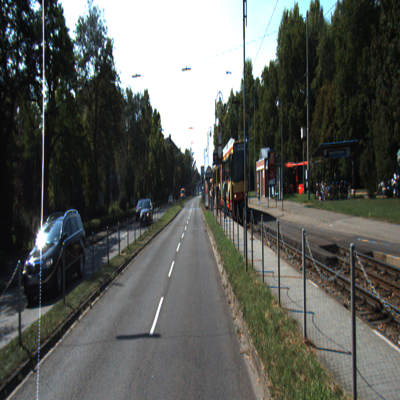

In [16]:
img = Image.open('/home/qiao/dev/giao/datasets/kittiseg/testing/image_2/000003_10.png').resize((400, 400))
img.show()
img = PILImage(img)

======> The size of seg_map: torch.Size([400, 400])


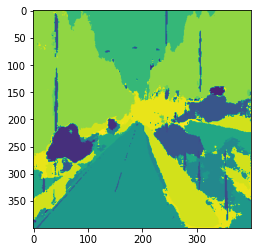

In [21]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
print(f'======> The size of seg_map: {seg_map.size()}')
plt.imshow(seg_map)
plt.savefig('seg_map')

In [20]:
# considering to concatenate the images
for images in folder:
    pred_mask = learn.predict(images)
    
cv2.cat(images)
pass

TensorMask([[26, 26, 26,  ..., 26, 26, 26],
        [26, 26, 26,  ..., 26, 26, 26],
        [26, 26, 26,  ..., 26, 26, 26],
        ...,
        [17, 17, 17,  ..., 17, 17, 17],
        [17, 17, 17,  ..., 17, 17, 17],
        [17, 17, 17,  ..., 17, 17, 17]])
